# Credit-Card-Fraud-Detection

# Data Overview

The dataset we have comprises transactions made by European cardholders in September 2013. It spans two days and includes 
284,807 transactions, of which 492 (or 0.172%) are fraudulent. 

This represents a highly unbalanced dataset, making traditional accuracy measurement through confusion matrix not suitable for our analysis.

The data is purely numerical, derived from a Principal Component Analysis (PCA) transformation. 

PCA is a method used to bring out strong patterns in a dataset by transforming the data into new coordinates. The original variables, however, cannot be provided due to confidentiality considerations. The PCA transformed features are labeled as V1, V2, through V28.

The response variable in this dataset is 'Class', with a value of "1" indicating a fraudulent transaction and "0" representing a legitimate one.

Due to the class imbalance in the dataset, it recommended to use the Area under the Precision-Recall Curve (AUPRC) as an accuracy metric. The AUPRC measures the trade-off between precision (how many of the transactions that we labeled as fraudulent were actually fraudulent) and recall (how many of the fraudulent transactions we successfully labeled as such).

This method is more suitable than a simple accuracy measurement in unbalanced datasets where the cost of missing a positive case (i.e., not detecting a fraud) can be very high.

# Data Exploration

Data exploration in anomaly detection involves examining and analyzing data to uncover its patterns and trends. This process aids in identifying anomalies or outliers within the data and selecting suitable detection methods.

In [2]:
# Import Libraries
import math 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from datetime import date, timedelta, datetime
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report,precision_score

Load and Review Data

In [3]:
data = pd.read_csv('../../data/creditcard.csv')
data_df = data.copy()
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Check for missing values
print(data_df.isna().sum())

# we don't have missing data 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Class nomalies

In [6]:
data_df['Class'].unique() #target variable 1: Fruad 0 : non fruad

array([0, 1], dtype=int64)

let’s print an overview of the class labels to understand better how balanced the two classes are.

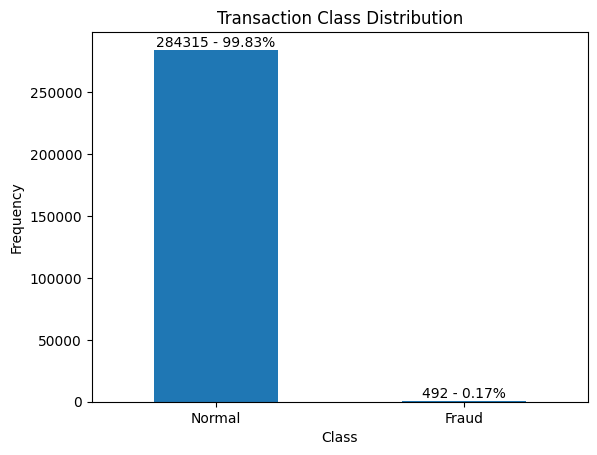

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

class_counts = data_df["Class"].value_counts()

LABELS = ['Normal', 'Fraud']
count_classes = pd.value_counts(data_df['Class'], sort=True)

# Calculate the percentages
fraud_percentage = round(count_classes[1] / len(data_df) * 100, 2)
normal_percentage = round(count_classes[0] / len(data_df) * 100, 2)

# Plot the countplot
ax = count_classes.plot(kind='bar', rot=0)
ax.set_title("Transaction Class Distribution")
ax.set_xticklabels(LABELS)
ax.set_xlabel("Class")
ax.set_ylabel("Frequency")

# Add count and percentage labels on the bars
for i, v in enumerate(count_classes):
    ax.text(i, v + 100, f'{v} - {round(v / len(data_df) * 100, 2)}%', ha='center', va='bottom')

plt.show()


The highly unbalanced nature of the dataset presents a challenge for traditional classification techniques. However, it is an ideal scenario for outlier detection algorithms such as the Isolation Forest (but we cant use it)

In [8]:
# Get the Fraud and the normal dataset 
fraud = data_df[data_df['Class']==1]  # Create a new dataframe called 'fraud' that contains only the rows from the original dataframe where the 'Class' column is equal to 1 (indicating a fraudulent transaction).
normal = data_df[data_df['Class']==0] # Create normal dataframe from original.
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [9]:
# We need to analyze more amount of information from the transaction data
# How different are the amount of money used in different transaction classes?
print(normal.Amount.describe())
fraud.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

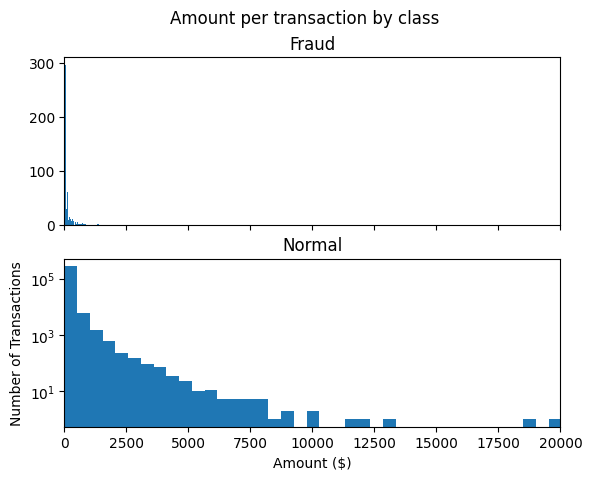

In [10]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True) 
f.suptitle('Amount per transaction by class') 
bins = 50  
ax1.hist(fraud.Amount, bins = bins) 
ax1.set_title('Fraud') 
ax2.hist(normal.Amount, bins = bins) 
ax2.set_title('Normal') 
plt.xlabel('Amount ($)') 
plt.ylabel('Number of Transactions') 
plt.xlim((0, 20000)) 
plt.yscale('log') 
plt.show(); 

#showing the distribution of transaction amounts

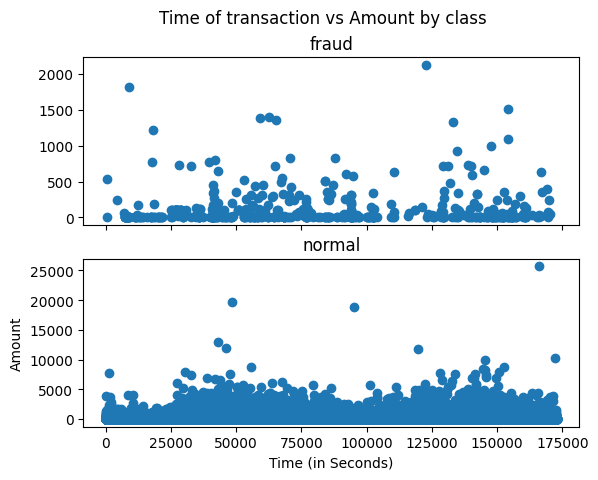

In [11]:
# checking fraudulent transactions occur more often during certain time frame
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True) 
f.suptitle('Time of transaction vs Amount by class') 
ax1.scatter(fraud.Time, fraud.Amount) 
ax1.set_title('fraud')
ax2.scatter(normal.Time, normal.Amount) 
ax2.set_title('normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount') 
plt.show() 

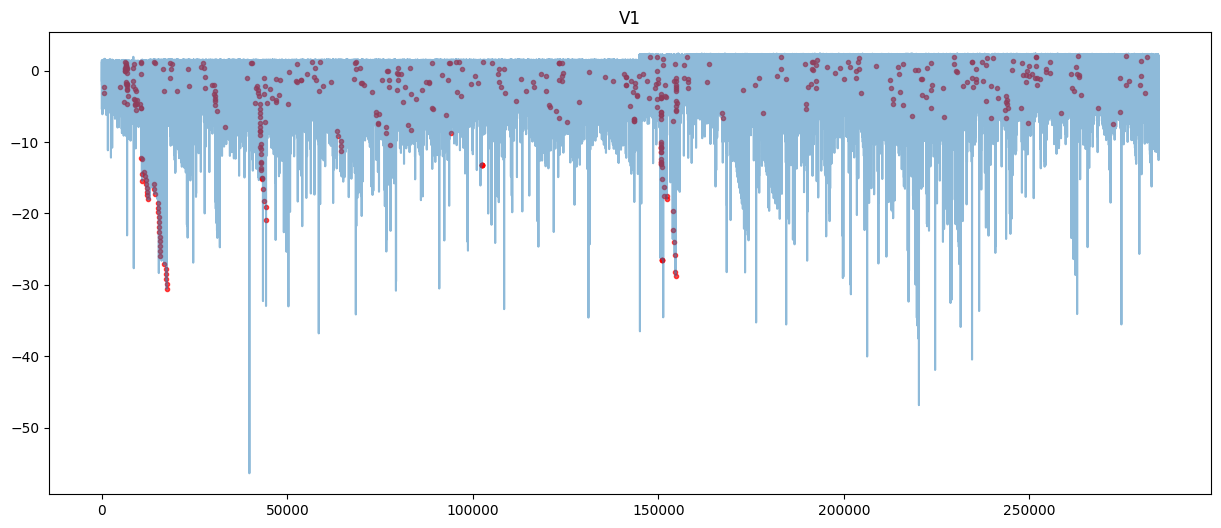

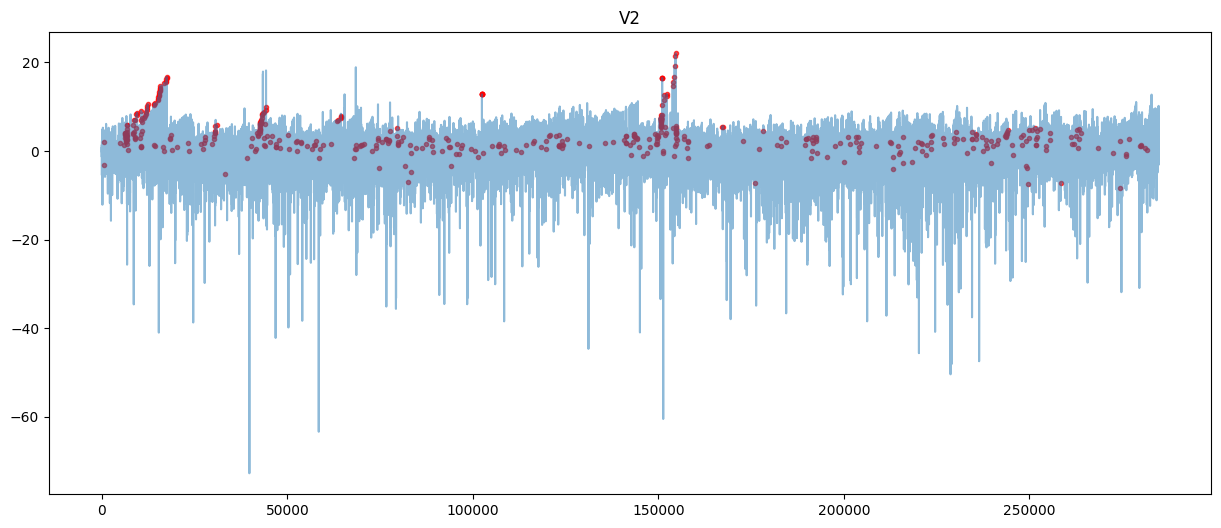

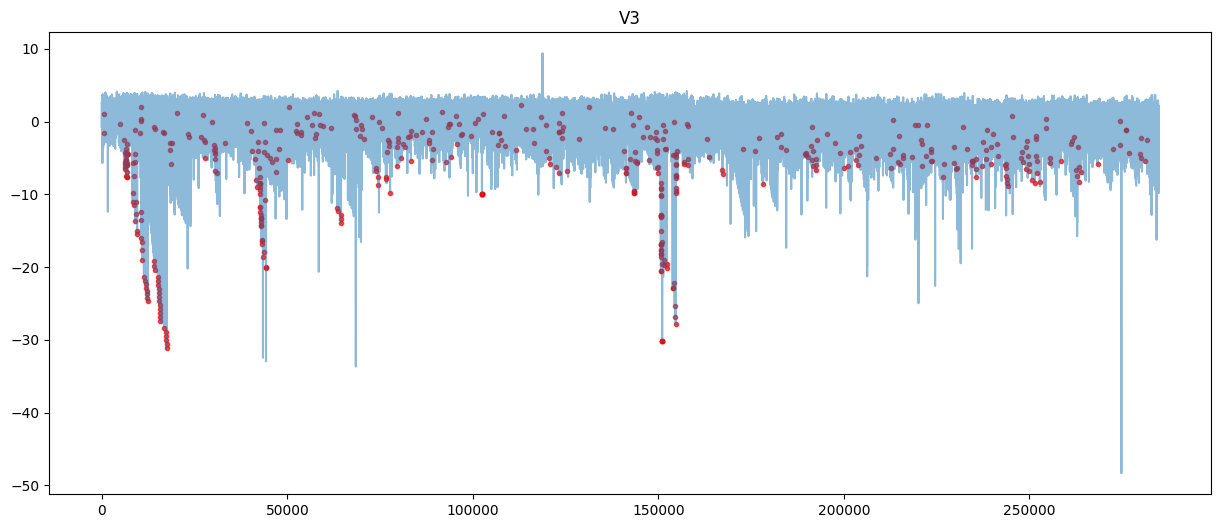

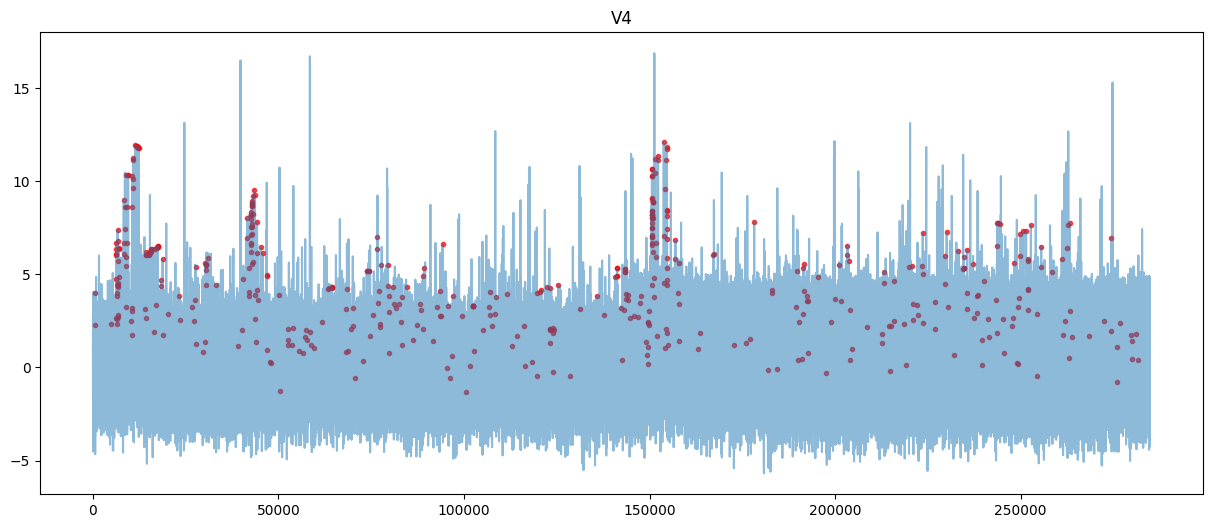

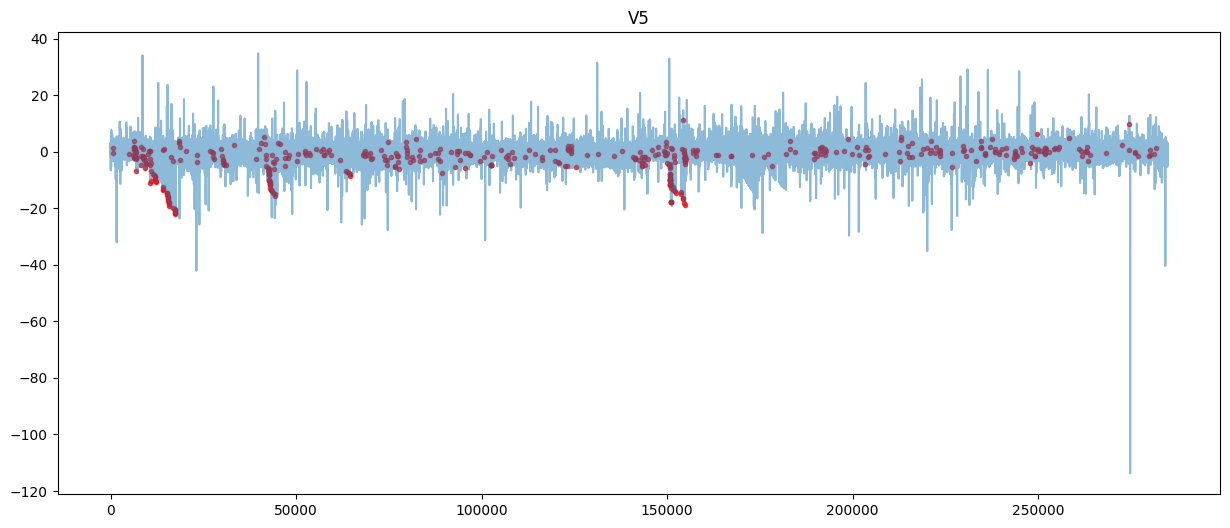

In [12]:
#we check for the selected features in our dataframeand display the frauds 
plt.rcParams['figure.figsize'] = (15, 6)
# select the first 5 'V' columns
columns_to_plot = data_df.columns[1:6]  

for data_info in columns_to_plot:
    data_Vs = data_df[data_info].bfill()
    
    frauds = data_Vs[(data_df['Class'] == 1)]
    frauds.plot(marker='.', linestyle='none', c="r", alpha=0.7)
    
    data_Vs.plot(alpha=0.5)
    
    data_null = data_df[data_info].fillna(-1)
    frauds = data_Vs[(data_null == -1)]
    frauds.plot(marker='.', linestyle='none', c="b", alpha=0.6)
    
    plt.title(data_info)
    plt.show()


# Calculating Median Absolute Deviation (MAD) for a DataFrame

In [13]:

def calculate_mad(data_df):
    # Calculate median of the data_df
    median = np.median(data_df)
    
    # Calculate absolute deviation from the median
    abs_deviation = np.abs(data_df - median)
    
    # Calculate MAD
    mad = np.median(abs_deviation)
    
    return mad

import numpy as np
import pandas as pd

# Assuming you have a DataFrame called 'data_df'
# Call the calculate_mad function and pass 'data_df' as the argument
mad_value = calculate_mad(data_df)

# Print the MAD value
print("MAD:", mad_value)


MAD: 0.4585265590855575


In [14]:
def identify_outliers_mad(data, constant=3.5):
    # Calculate the MAD
    mad = calculate_mad(data)
    
    # Calculate the median
    median = np.median(data)
    
    # Calculate the absolute deviation from the median
    abs_deviation = np.abs(data - median)
    
    # Identify outliers
    outliers = (abs_deviation / mad) > constant
    
    return outliers


# Identifying Anomalies using Median Absolute Deviation (MAD)

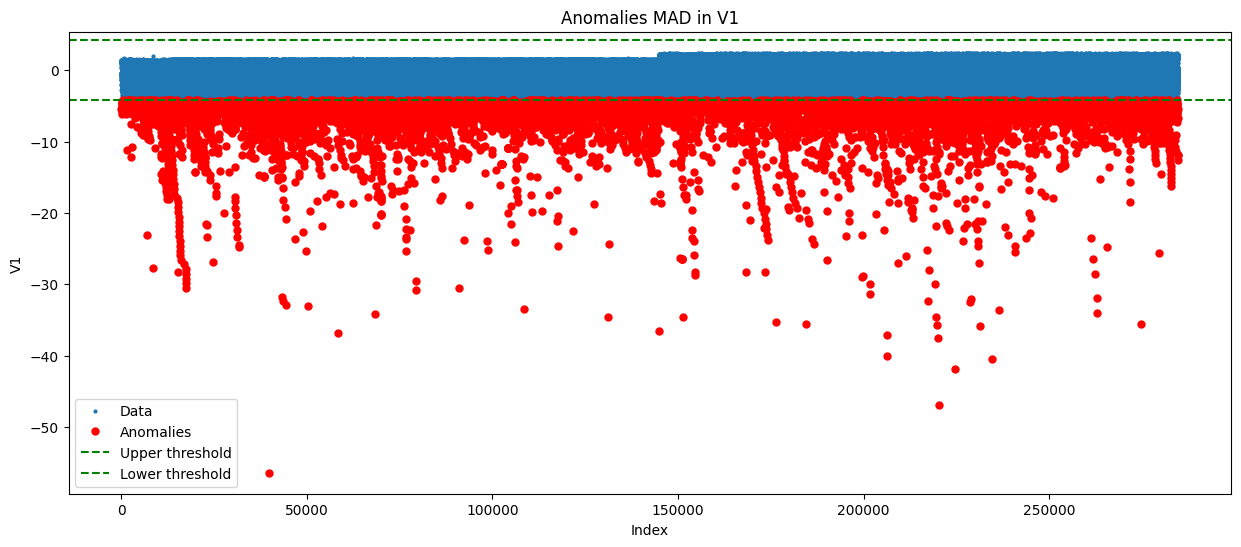

Metrics for column V1:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    284315
           1       0.02      0.36      0.04       492

    accuracy                           0.97    284807
   macro avg       0.51      0.67      0.52    284807
weighted avg       1.00      0.97      0.98    284807

Confusion Matrix:
[[277075   7240]
 [   315    177]]
F1 Score:  0.04475913516247314
Precision Score:  0.023864095995685588
Recall Score:  0.3597560975609756
Accuracy Score:  0.9734732643509464
False Negative Rate:  0.6402439024390244
False Positive Rate:  0.02546471343404323
Accuracy:  0.9734732643509464


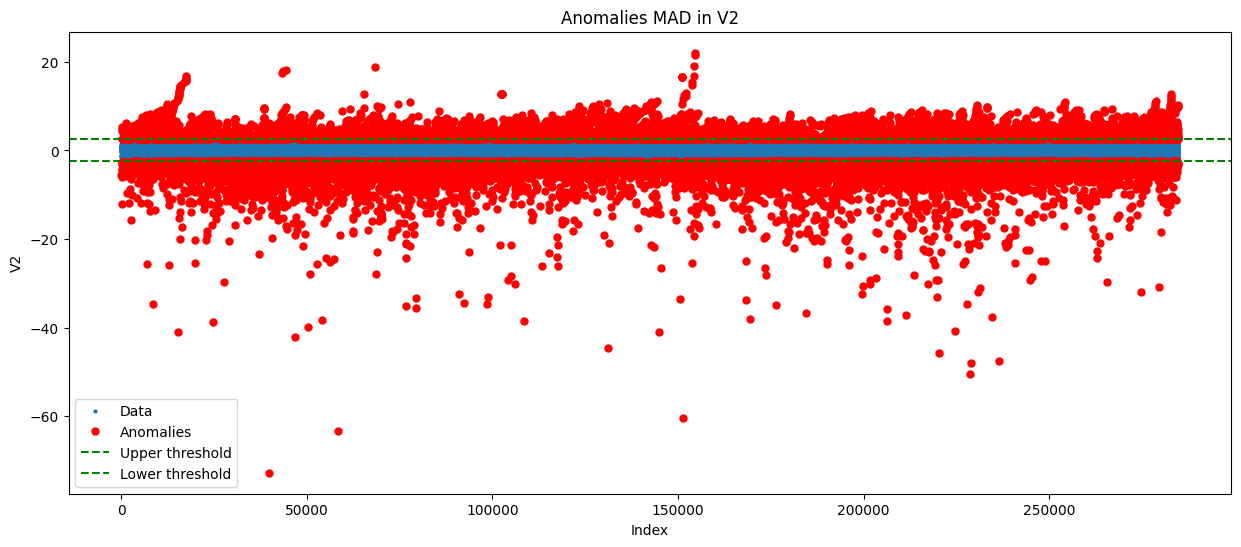

Metrics for column V2:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    284315
           1       0.02      0.56      0.03       492

    accuracy                           0.94    284807
   macro avg       0.51      0.75      0.50    284807
weighted avg       1.00      0.94      0.97    284807

Confusion Matrix:
[[267456  16859]
 [   215    277]]
F1 Score:  0.031427274790106645
Precision Score:  0.01616479925303455
Recall Score:  0.5630081300813008
Accuracy Score:  0.9400506307780356
False Negative Rate:  0.4369918699186992
False Positive Rate:  0.05929690660007386
Accuracy:  0.9400506307780356


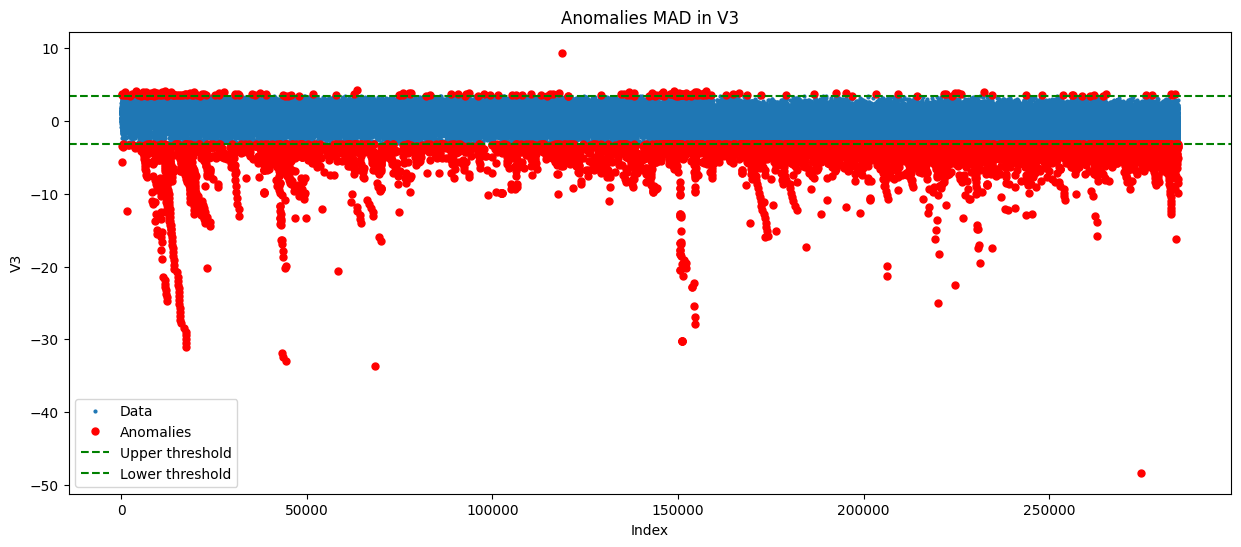

Metrics for column V3:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    284315
           1       0.05      0.68      0.09       492

    accuracy                           0.98    284807
   macro avg       0.52      0.83      0.54    284807
weighted avg       1.00      0.98      0.99    284807

Confusion Matrix:
[[278021   6294]
 [   158    334]]
F1 Score:  0.09382022471910112
Precision Score:  0.0503922751961376
Recall Score:  0.6788617886178862
Accuracy Score:  0.9773460624212186
False Negative Rate:  0.32113821138211385
False Positive Rate:  0.02213741800467791
Accuracy:  0.9773460624212186


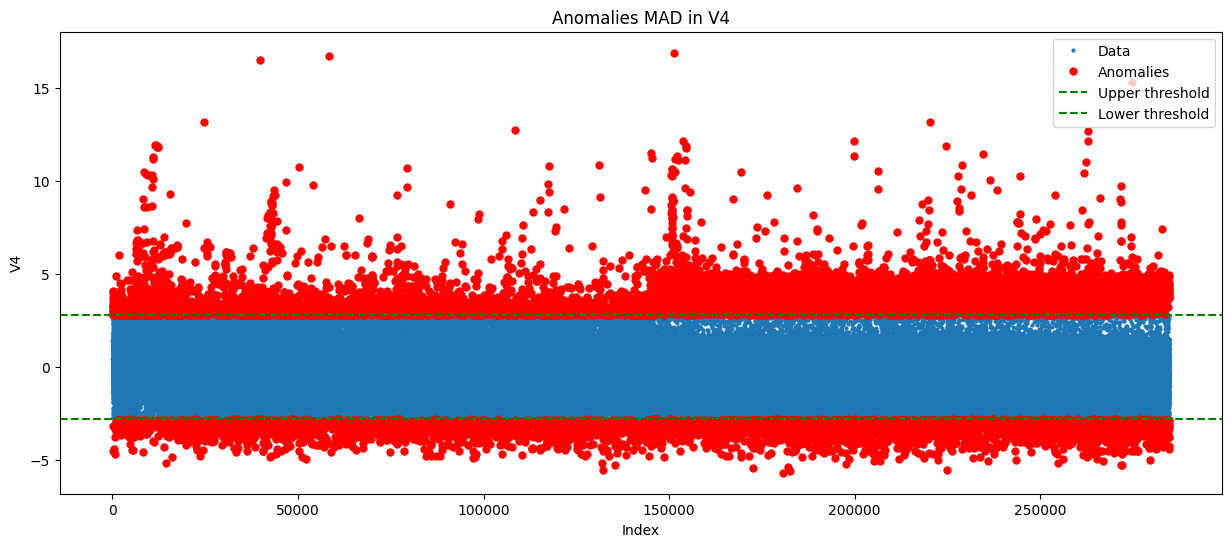

Metrics for column V4:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    284315
           1       0.02      0.69      0.04       492

    accuracy                           0.94    284807
   macro avg       0.51      0.82      0.50    284807
weighted avg       1.00      0.94      0.97    284807

Confusion Matrix:
[[267868  16447]
 [   152    340]]
F1 Score:  0.03935412928988946
Precision Score:  0.020253767796509205
Recall Score:  0.6910569105691057
Accuracy Score:  0.9417184268645082
False Negative Rate:  0.3089430894308943
False Positive Rate:  0.057847809647749854
Accuracy:  0.9417184268645082


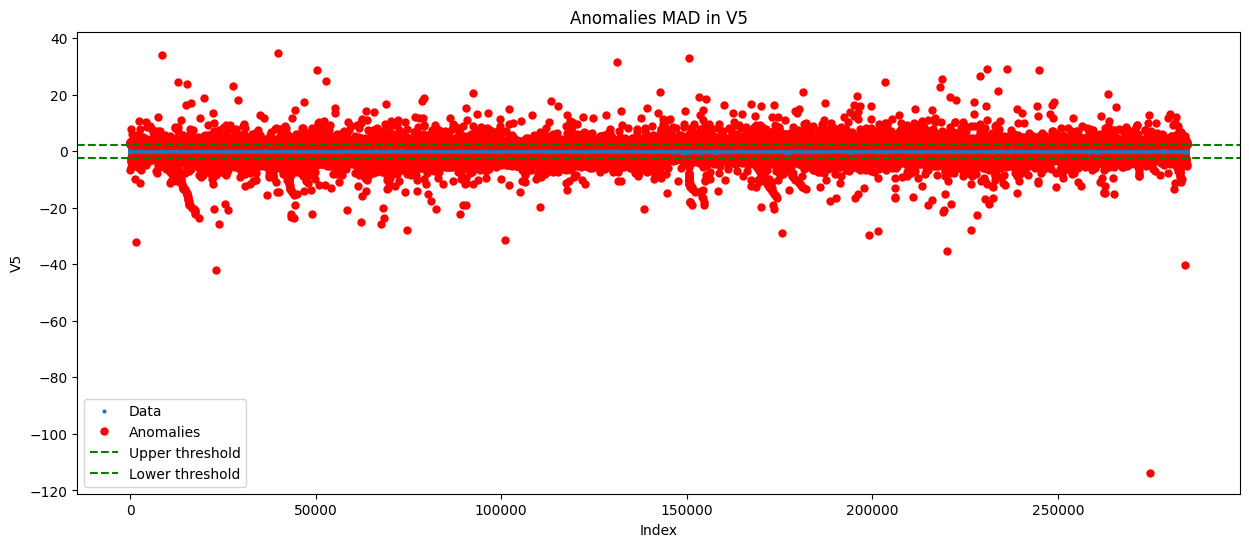

Metrics for column V5:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    284315
           1       0.01      0.45      0.02       492

    accuracy                           0.94    284807
   macro avg       0.51      0.69      0.50    284807
weighted avg       1.00      0.94      0.97    284807

Confusion Matrix:
[[266961  17354]
 [   273    219]]
F1 Score:  0.024245779130916138
Precision Score:  0.012462300119501508
Recall Score:  0.4451219512195122
Accuracy Score:  0.938108965018416
False Negative Rate:  0.5548780487804879
False Positive Rate:  0.06103793327823013
Accuracy:  0.938108965018416


In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

# Identify the outliers using MAD
def identify_outliers_mad(data):
    median = np.median(data)
    mad = calculate_mad(data)
    threshold = 3.5 * mad
    outliers = (data - median).abs() > threshold
    return outliers

# Calculate MAD
def calculate_mad(data):
    median = np.median(data)
    abs_deviation = np.abs(data - median)
    mad = np.median(abs_deviation)
    return mad

def calculate_metrics(y_true, y_pred):
    print('Classification Report:')
    print(classification_report(y_true, y_pred))
    
    cnf_matrix = confusion_matrix(y_true, y_pred)
    print('Confusion Matrix:')
    print(cnf_matrix)
    
    TP = cnf_matrix[1,1]
    TN = cnf_matrix[0,0]
    FP = cnf_matrix[0,1]
    FN = cnf_matrix[1,0]
    
    FNR = FN / (FN + TP)
    FPR = FP / (FP + TN)
    ACC = (TP + TN) / (TP + FP + FN + TN)
    
    print('F1 Score: ', f1_score(y_true, y_pred))
    print('Precision Score: ', precision_score(y_true, y_pred))
    print('Recall Score: ', recall_score(y_true, y_pred))
    print('Accuracy Score: ', accuracy_score(y_true, y_pred))
    print('False Negative Rate: ', FNR)
    print('False Positive Rate: ', FPR)
    print('Accuracy: ', ACC)

# Columns V1 to V5
columns = ['V1', 'V2', 'V3', 'V4', 'V5']

for column in columns:
    # Create a new figure
    plt.figure(figsize=(15, 6))
    
    # Identify the outliers for the current column
    outliers = identify_outliers_mad(data_df[column])

    # Plot the data
    plt.plot(data_df[column], marker='o', markersize=2, linestyle='', label='Data')

    # Plot the outliers in a different color and size
    plt.plot(data_df[column][outliers], marker='o', markersize=5, linestyle='', color='red', label='Anomalies')

    # Draw a horizontal line at the upper and lower thresholds
    median = np.median(data_df[column])
    mad = calculate_mad(data_df[column])
    upper_threshold = median + (3.5 * mad)
    lower_threshold = median - (3.5 * mad)
    plt.axhline(upper_threshold, color='green', linestyle='--', label='Upper threshold')
    plt.axhline(lower_threshold, color='green', linestyle='--', label='Lower threshold')

    # Add legend and labels
    plt.legend()
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.title(f'Anomalies MAD in {column}')

    # Show the plot for the current column
    plt.show()
    
    y_true = data_df['Class']
    y_pred = identify_outliers_mad(data_df[column]).astype(int)
    print(f'Metrics for column {column}:')
    calculate_metrics(y_true, y_pred)


# Identifying Outliers using Z-score Method

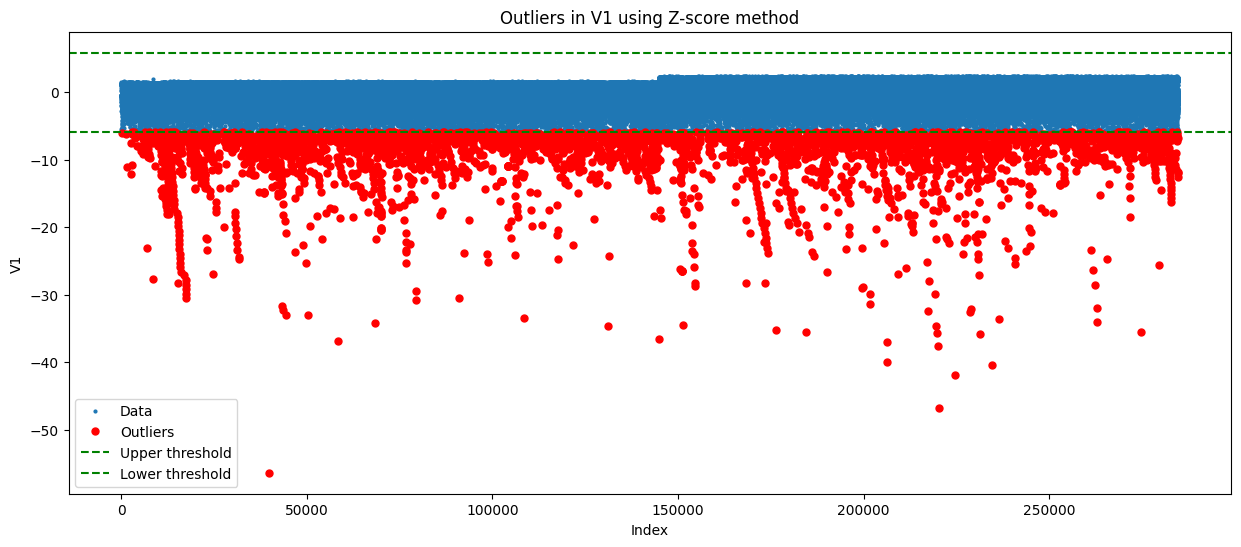

Metrics for column V1:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    284315
           1       0.03      0.26      0.06       492

    accuracy                           0.99    284807
   macro avg       0.52      0.62      0.53    284807
weighted avg       1.00      0.99      0.99    284807

Confusion Matrix:
[[280742   3573]
 [   364    128]]
F1 Score:  0.06105413784879561
Precision Score:  0.03458524723047825
Recall Score:  0.2601626016260163
Accuracy Score:  0.986176603805384
False Negative Rate:  0.7398373983739838
False Positive Rate:  0.012567047113237079
Accuracy:  0.986176603805384


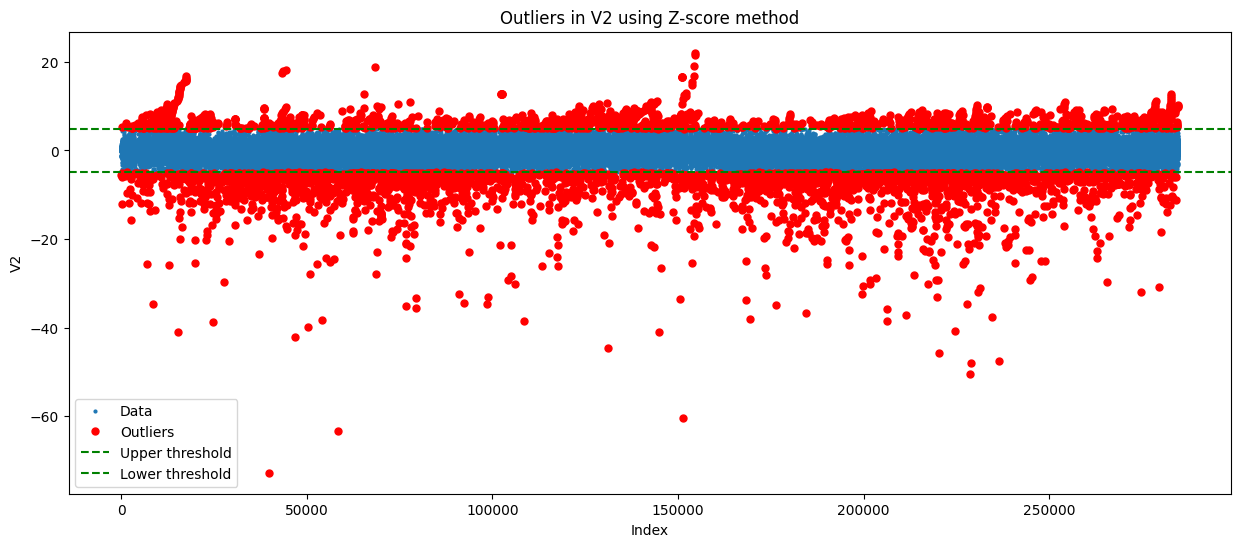

Metrics for column V2:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    284315
           1       0.03      0.26      0.05       492

    accuracy                           0.98    284807
   macro avg       0.51      0.62      0.52    284807
weighted avg       1.00      0.98      0.99    284807

Confusion Matrix:
[[280127   4188]
 [   362    130]]
F1 Score:  0.054054054054054064
Precision Score:  0.030106530801296896
Recall Score:  0.26422764227642276
Accuracy Score:  0.9840242690664204
False Negative Rate:  0.7357723577235772
False Positive Rate:  0.014730140864885779
Accuracy:  0.9840242690664204


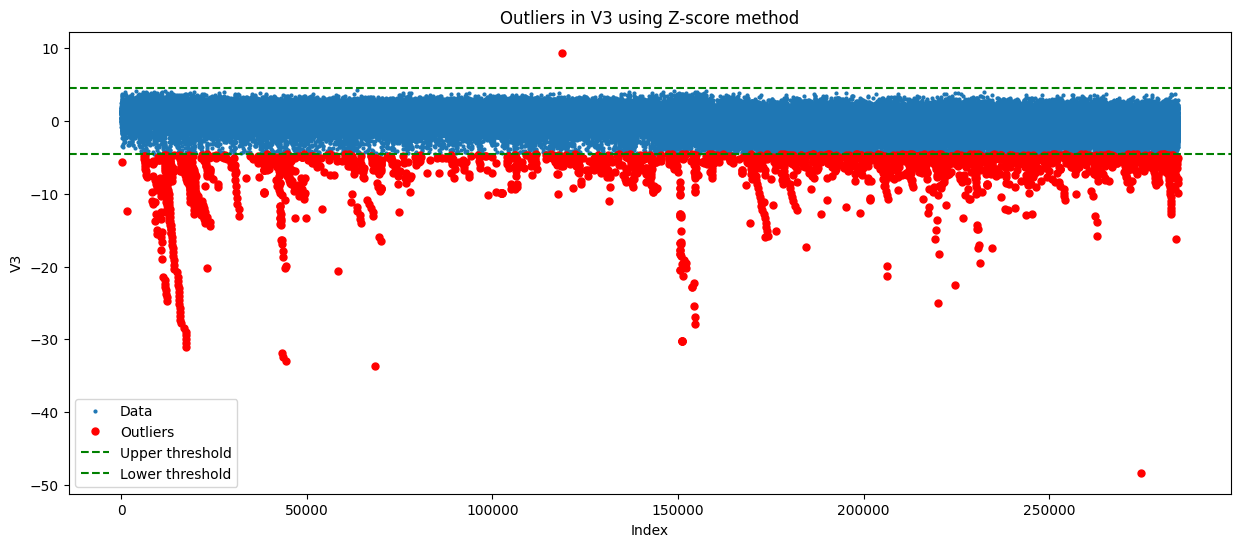

Metrics for column V3:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    284315
           1       0.14      0.55      0.22       492

    accuracy                           0.99    284807
   macro avg       0.57      0.77      0.61    284807
weighted avg       1.00      0.99      1.00    284807

Confusion Matrix:
[[282599   1716]
 [   221    271]]
F1 Score:  0.21863654699475596
Precision Score:  0.13638651233014595
Recall Score:  0.5508130081300813
Accuracy Score:  0.9931989031168476
False Negative Rate:  0.4491869918699187
False Positive Rate:  0.006035559150941737
Accuracy:  0.9931989031168476


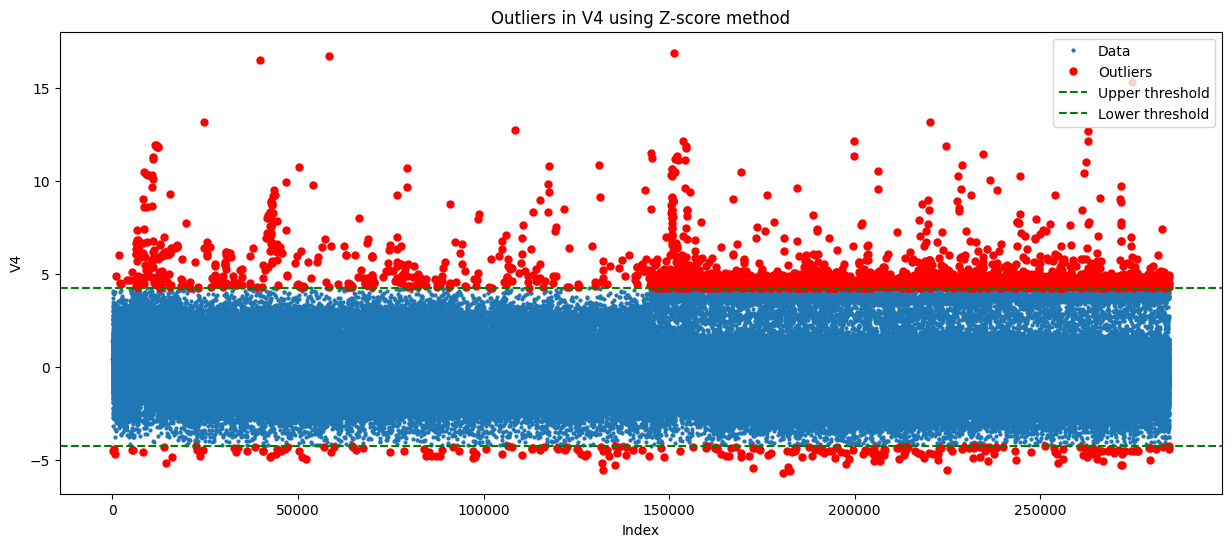

Metrics for column V4:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    284315
           1       0.08      0.49      0.13       492

    accuracy                           0.99    284807
   macro avg       0.54      0.74      0.56    284807
weighted avg       1.00      0.99      0.99    284807

Confusion Matrix:
[[281462   2853]
 [   251    241]]
F1 Score:  0.13441160066926938
Precision Score:  0.07789269553975436
Recall Score:  0.4898373983739837
Accuracy Score:  0.9891013914686085
False Negative Rate:  0.5101626016260162
False Positive Rate:  0.010034644672282503
Accuracy:  0.9891013914686085


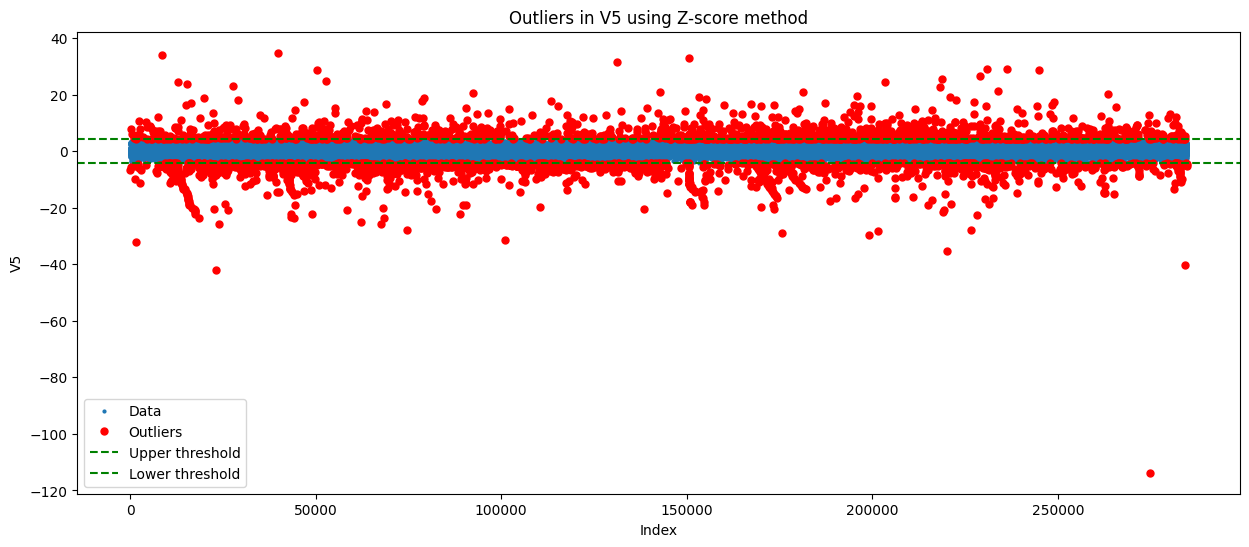

Metrics for column V5:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    284315
           1       0.05      0.30      0.08       492

    accuracy                           0.99    284807
   macro avg       0.52      0.64      0.54    284807
weighted avg       1.00      0.99      0.99    284807

Confusion Matrix:
[[281516   2799]
 [   346    146]]
F1 Score:  0.08495781204538841
Precision Score:  0.04957555178268251
Recall Score:  0.2967479674796748
Accuracy Score:  0.9889574343327235
False Negative Rate:  0.7032520325203252
False Positive Rate:  0.00984471448921091
Accuracy:  0.9889574343327235


In [16]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

# Identify the outliers using Z-score
def identify_outliers_zscore(data, threshold=3):
    z_scores = stats.zscore(data)
    outliers = np.abs(z_scores) > threshold
    return outliers

# Columns V1 to V5
columns = ['V1', 'V2', 'V3', 'V4', 'V5']

for column in columns:
    # Create a new figure
    plt.figure(figsize=(15, 6))
    
    # Compute z-scores for the current column
    outliers = identify_outliers_zscore(data_df[column])

    # Plot the data
    plt.plot(data_df[column], marker='o', markersize=2, linestyle='', label='Data')

    # Plot the outliers in a different color and size
    plt.plot(data_df[column][outliers], marker='o', markersize=5, linestyle='', color='red', label='Outliers')

    # Draw a horizontal line at the upper and lower thresholds
    upper_threshold = np.mean(data_df[column]) + 3 * np.std(data_df[column])
    lower_threshold = np.mean(data_df[column]) - 3 * np.std(data_df[column])
    plt.axhline(upper_threshold, color='green', linestyle='--', label='Upper threshold')
    plt.axhline(lower_threshold, color='green', linestyle='--', label='Lower threshold')

    # Add legend and labels
    plt.legend()
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.title(f'Outliers in {column} using Z-score method')

    # Show the plot for the current column
    plt.show()

    y_true = data_df['Class']
    y_pred = identify_outliers_zscore(data_df[column]).astype(int)
    print(f'Metrics for column {column}:')
    calculate_metrics(y_true, y_pred)


# Identifying Outliers using Percentile Method

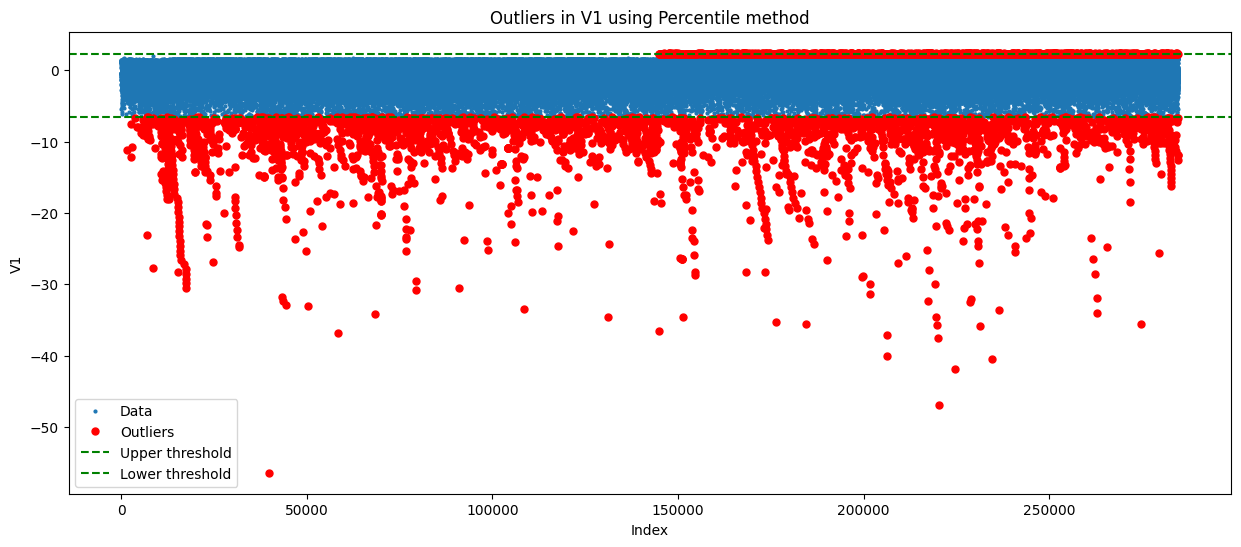

Metrics for column V1:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    284315
           1       0.02      0.24      0.04       492

    accuracy                           0.98    284807
   macro avg       0.51      0.61      0.51    284807
weighted avg       1.00      0.98      0.99    284807

Confusion Matrix:
[[278733   5582]
 [   376    116]]
F1 Score:  0.037479806138933765
Precision Score:  0.020358020358020357
Recall Score:  0.23577235772357724
Accuracy Score:  0.97908057035115
False Negative Rate:  0.7642276422764228
False Positive Rate:  0.01963315336862283
Accuracy:  0.97908057035115


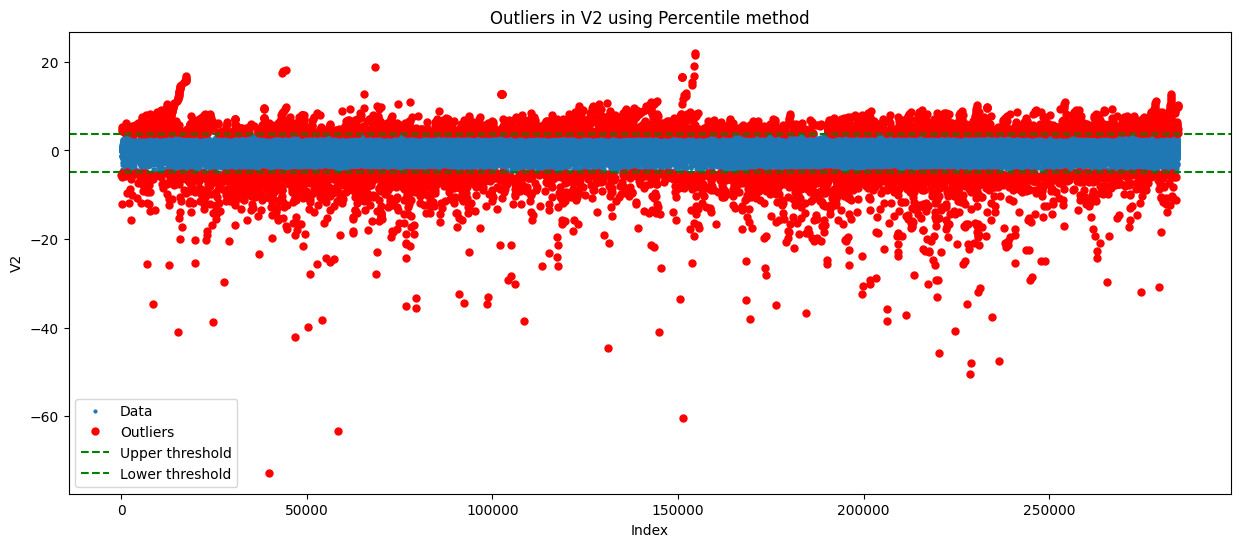

Metrics for column V2:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    284315
           1       0.03      0.35      0.06       492

    accuracy                           0.98    284807
   macro avg       0.51      0.67      0.52    284807
weighted avg       1.00      0.98      0.99    284807

Confusion Matrix:
[[278790   5525]
 [   319    173]]
F1 Score:  0.05589660743134087
Precision Score:  0.030361530361530362
Recall Score:  0.3516260162601626
Accuracy Score:  0.9794808414119035
False Negative Rate:  0.6483739837398373
False Positive Rate:  0.019432671508713927
Accuracy:  0.9794808414119035


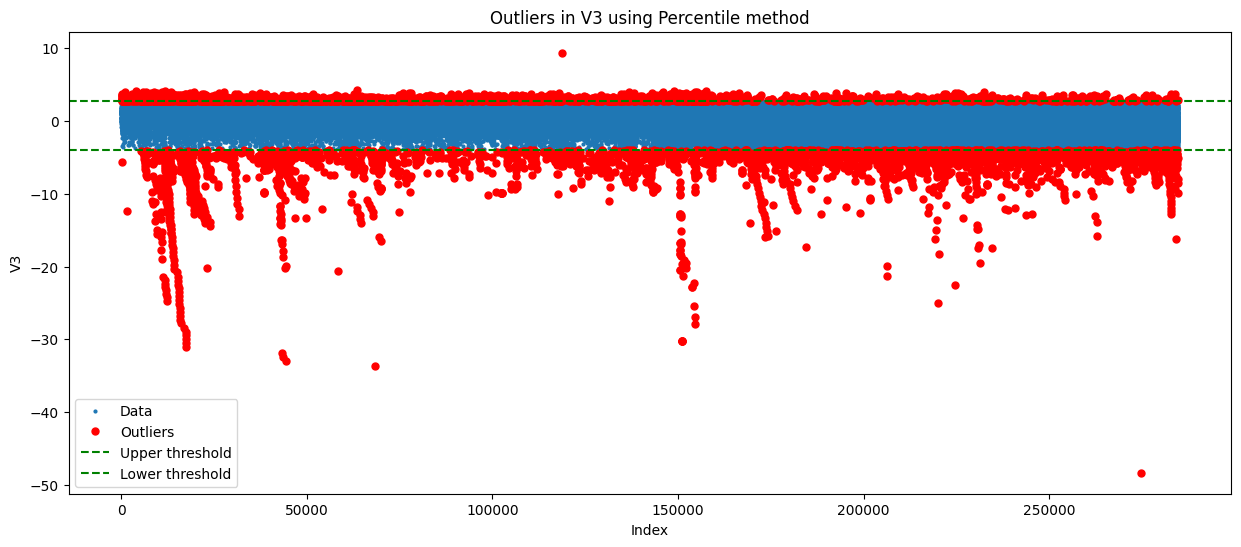

Metrics for column V3:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    284315
           1       0.05      0.61      0.10       492

    accuracy                           0.98    284807
   macro avg       0.53      0.80      0.54    284807
weighted avg       1.00      0.98      0.99    284807

Confusion Matrix:
[[278917   5398]
 [   192    300]]
F1 Score:  0.09693053311793216
Precision Score:  0.05265005265005265
Recall Score:  0.6097560975609756
Accuracy Score:  0.9803726734244593
False Negative Rate:  0.3902439024390244
False Positive Rate:  0.01898598385593444
Accuracy:  0.9803726734244593


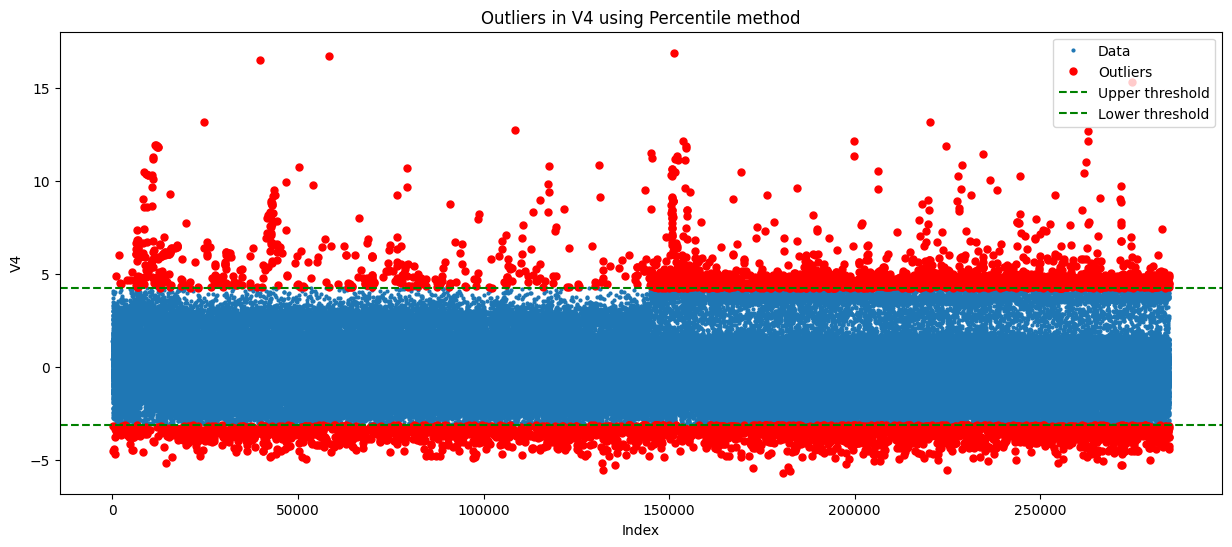

Metrics for column V4:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    284315
           1       0.04      0.49      0.08       492

    accuracy                           0.98    284807
   macro avg       0.52      0.74      0.53    284807
weighted avg       1.00      0.98      0.99    284807

Confusion Matrix:
[[278858   5457]
 [   251    241]]
F1 Score:  0.0778675282714055
Precision Score:  0.0422955422955423
Recall Score:  0.4898373983739837
Accuracy Score:  0.979958357765083
False Negative Rate:  0.5101626016260162
False Positive Rate:  0.019193500167068216
Accuracy:  0.979958357765083


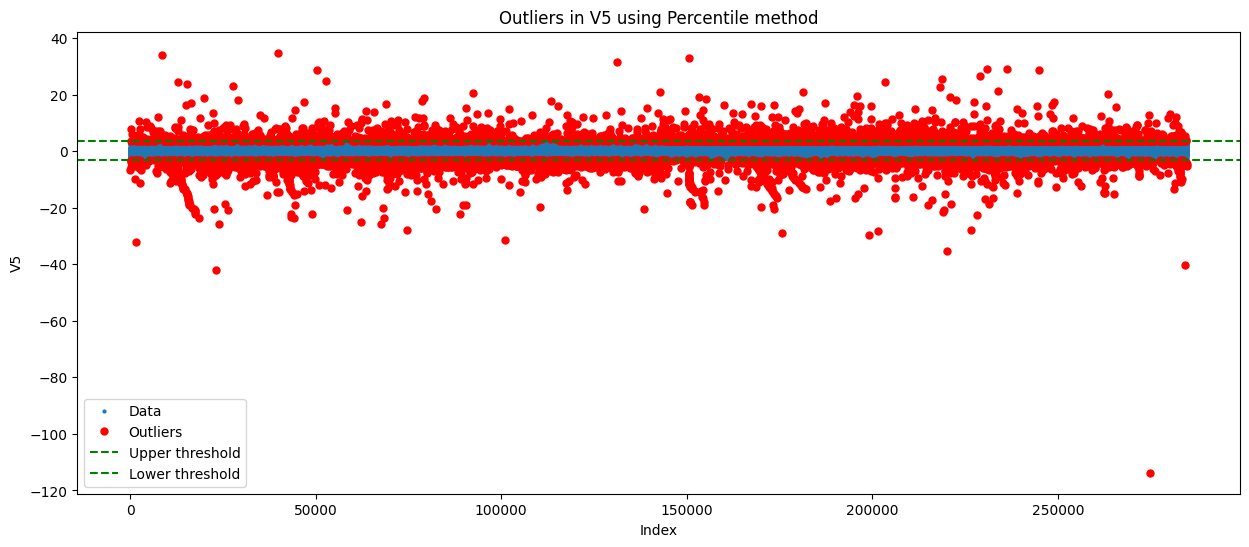

Metrics for column V5:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    284315
           1       0.03      0.37      0.06       492

    accuracy                           0.98    284807
   macro avg       0.52      0.68      0.52    284807
weighted avg       1.00      0.98      0.99    284807

Confusion Matrix:
[[278799   5516]
 [   310    182]]
F1 Score:  0.05880452342487884
Precision Score:  0.03194103194103194
Recall Score:  0.3699186991869919
Accuracy Score:  0.9795440421057067
False Negative Rate:  0.6300813008130082
False Positive Rate:  0.019401016478201995
Accuracy:  0.9795440421057067


In [17]:
import matplotlib.pyplot as plt

# Columns V1 to V5
columns = ['V1', 'V2', 'V3', 'V4', 'V5']

# Create a new figure
plt.figure(figsize=(15, 6))

for column in columns:
    # Define the upper and lower percentiles
    upper_percentile = 99
    lower_percentile = 1

    # Calculate the thresholds for the current column
    upper_threshold = data_df[column].quantile(upper_percentile / 100.0)
    lower_threshold = data_df[column].quantile(lower_percentile / 100.0)

    # Identify the outliers for the current column
    outliers = (data_df[column] > upper_threshold) | (data_df[column] < lower_threshold)

    # Plot the data
    plt.plot(data_df[column], marker='o', markersize=2, linestyle='', label='Data')

    # Plot the outliers in a different color and size
    plt.plot(data_df[column][outliers], marker='o', markersize=5, linestyle='', color='red', label='Outliers')

    # Draw a horizontal line at the upper and lower threshold
    plt.axhline(upper_threshold, color='green', linestyle='--', label='Upper threshold')
    plt.axhline(lower_threshold, color='green', linestyle='--', label='Lower threshold')

    # Add legend and labels
    plt.legend()
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.title(f'Outliers in {column} using Percentile method')

    # Show the plot for the current column
    plt.show()

    # Generate the metrics
    y_true = data_df['Class']
    y_pred = outliers.astype(int)
    print(f'Metrics for column {column}:')
    calculate_metrics(y_true, y_pred)


# Train-Test Split

In [18]:
# Scale the features to have mean=0 and variance=1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Only the columns V1 to V28 need to be scaled.
cols = data_df.drop(['Time', 'Class'], axis=1).columns
data_df[cols] = scaler.fit_transform(data_df[cols])

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X = data_df.drop(['Class'], axis=1)
y = data_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Local Outlier Factor (LOF) Model Training and Prediction

In [19]:
from sklearn.neighbors import LocalOutlierFactor

# Instantiate the model
lof = LocalOutlierFactor(novelty=True)

# Train the model
lof.fit(X_train)

# Predict the test set
y_pred_lof = lof.predict(X_test)
# LOF returns 1 for inliers and -1 for outliers. Convert the labels into 0 (for inliers) and 1 (for outliers)
y_pred_lof = (y_pred_lof < 0).astype(int)


c:\Users\KB\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


In [20]:
from sklearn.metrics import classification_report, roc_auc_score
# LOF
print('Local Outlier Factor:')
print(classification_report(y_test, y_pred_lof))


Local Outlier Factor:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.56      0.10        98

    accuracy                           0.98     56962
   macro avg       0.53      0.77      0.55     56962
weighted avg       1.00      0.98      0.99     56962



# Anomaly Detection Using Local Outlier Factor for Features V1 to V5

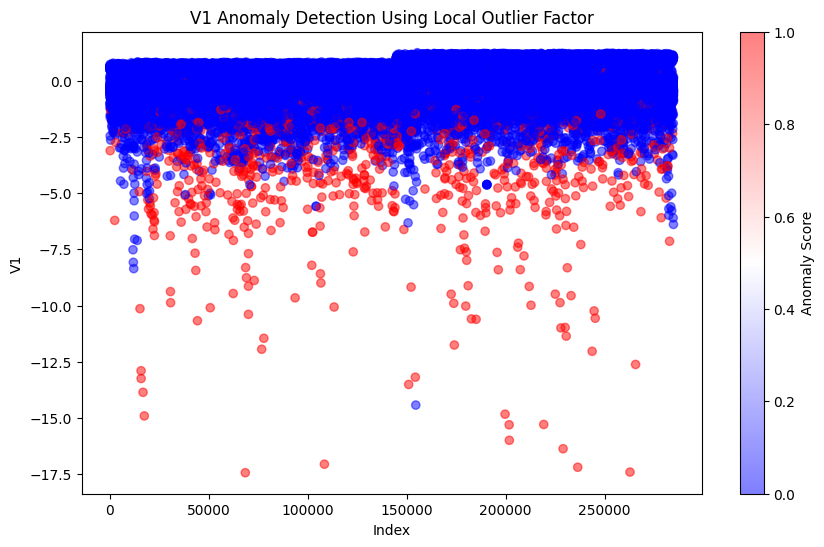

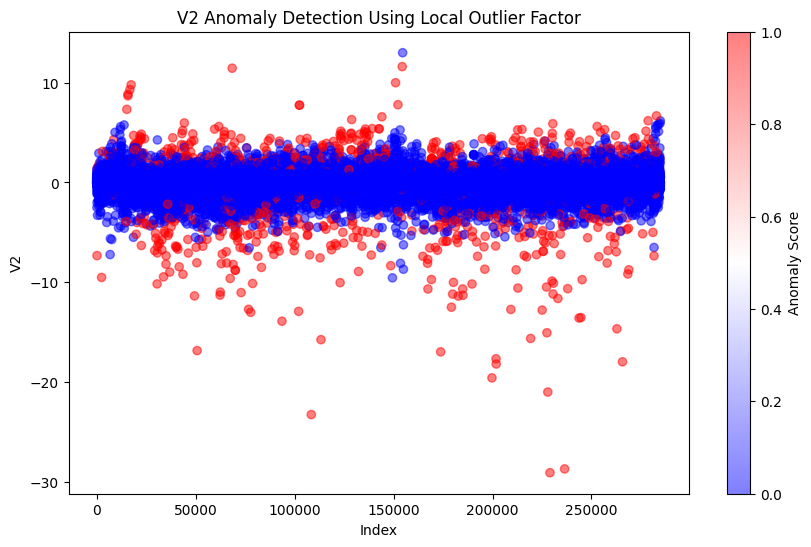

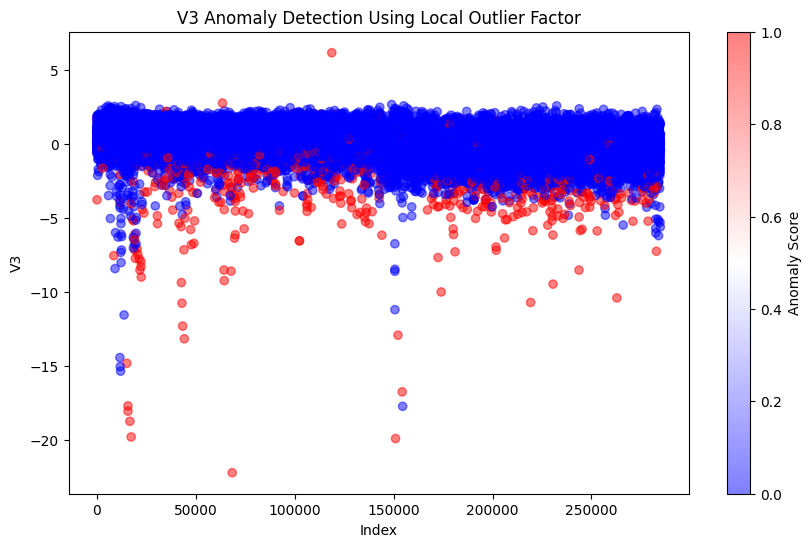

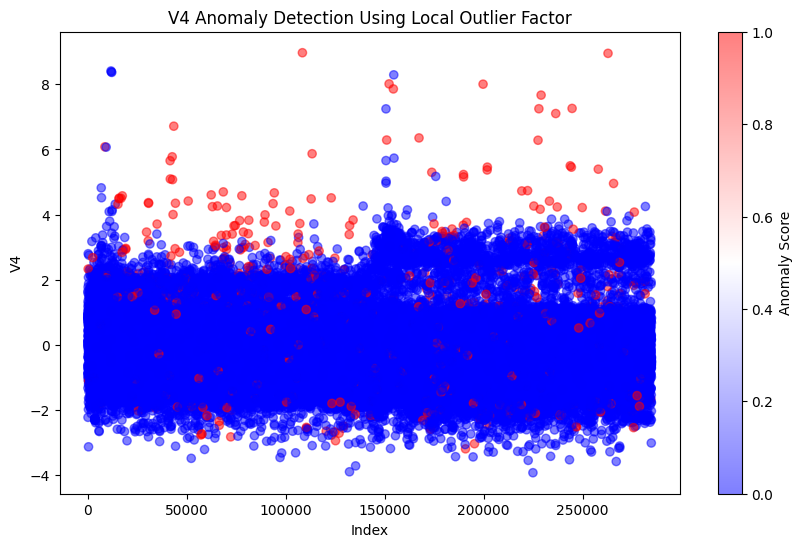

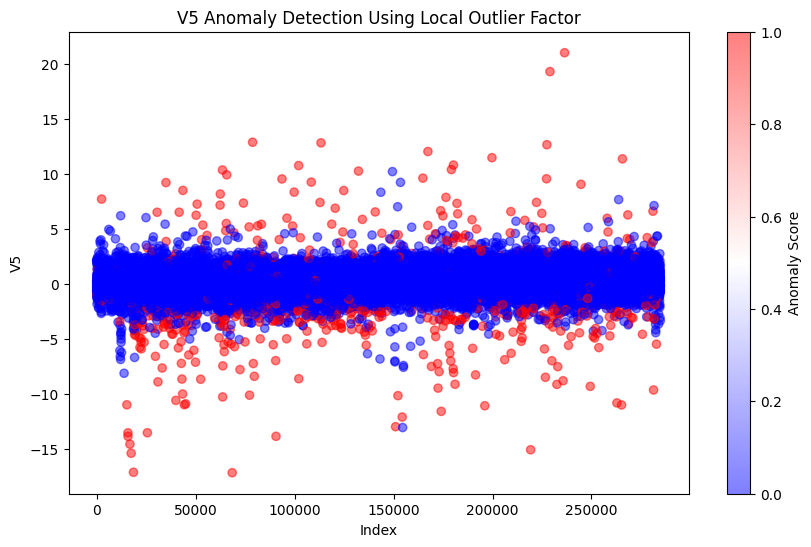

In [23]:
import matplotlib.pyplot as plt

# Create a separate DataFrame to hold our results
df_result = X_test.copy()
df_result['y_pred'] = y_pred_lof

# Define the features we're interested in
features = ['V1', 'V2', 'V3', 'V4', 'V5']

# Plot each feature
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df_result.index, df_result[feature], c=df_result['y_pred'], cmap='bwr', alpha=0.5)
    plt.title(f'{feature} Anomaly Detection Using Local Outlier Factor')
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.colorbar(label='Anomaly Score')
    plt.show()
